In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid', rc={"axes.spines.bottom": True, "axes.spines.left": True})
sns.set_palette('Paired')

import matplotlib.pyplot as plt
import plotly.express as px

import torch
from torchvision import transforms as transforms

from sklearn.model_selection import train_test_split

## Train Test Split

In [3]:
df = pd.read_csv('../data/labels.csv')
df.head()

,image,type,subtype
0,100161900.png,Rost,Strassenrost
1,100184900.png,Rost,Strassenrost
2,100034700.png,Rost,Strassenrost
3,100003200.png,Vollguss,Handgriff geschlossen
4,100004000.png,Gussbeton,Pickelloch belueftet


In [4]:
df.isnull().sum()

image      0
type       0
subtype    0
dtype: int64

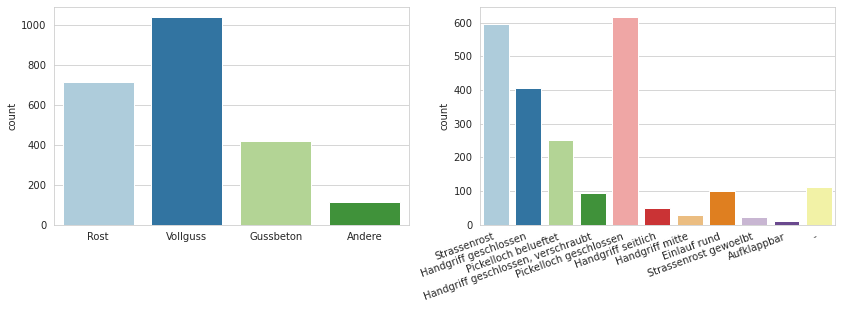

In [5]:
fig = plt.subplots(figsize=(14, 4))

plt.subplot(1,2,1)
p = sns.countplot(x=df['type'], palette='Paired')
p.set_xlabel('')

plt.subplot(1,2,2)
p = sns.countplot(x=df['subtype'], palette='Paired')
p.set_xlabel('')
p.set_xticklabels(p.get_xticklabels(), rotation=20, fontdict=dict(ha='right'))

plt.show()

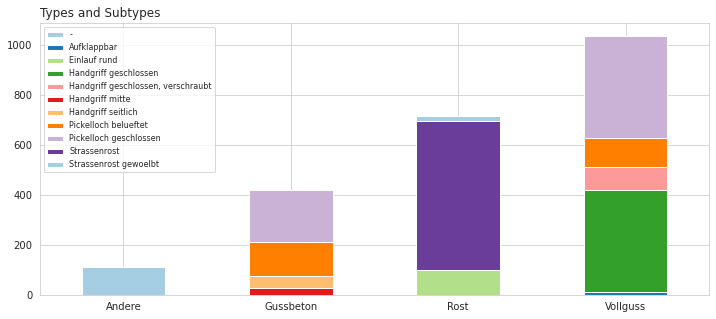

In [6]:
tmp = df.pivot_table(index='type', columns='subtype', 
                     values= 'image', aggfunc=len, fill_value=0)

p = tmp.plot(kind='bar', stacked=True, figsize=(12, 5), 
             color=sns.color_palette('Paired', 10) , xlabel='')
p.set_title('Types and Subtypes', loc='left')
p.set_xticklabels(labels=p.get_xticklabels(), rotation=0)
p.legend(fontsize=8)
plt.show()

In [7]:
df['concatenated_type'] = df['type'] + ' / ' + df['subtype']
df.head()

,image,type,subtype,concatenated_type
0,100161900.png,Rost,Strassenrost,Rost / Strassenrost
1,100184900.png,Rost,Strassenrost,Rost / Strassenrost
2,100034700.png,Rost,Strassenrost,Rost / Strassenrost
3,100003200.png,Vollguss,Handgriff geschlossen,Vollguss / Handgriff geschlossen
4,100004000.png,Gussbeton,Pickelloch belueftet,Gussbeton / Pickelloch belueftet


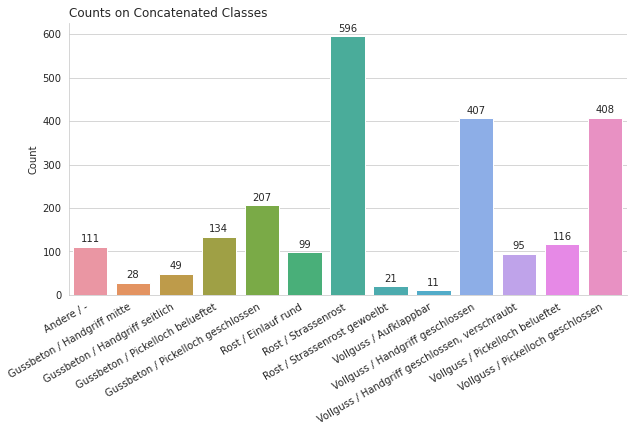

In [8]:
tmp = df.groupby('concatenated_type').count()['image']

fig = plt.subplots(figsize=(10, 5))

p = sns.barplot(x=tmp.index, y=tmp)
p.set_xticklabels(labels=p.get_xticklabels(), ha='right', rotation=30)
p.set_xlabel('')
p.set_ylabel('Count')
p.set_title('Counts on Concatenated Classes', loc='left')

for i, val in enumerate(tmp.to_list()):
    plt.text(x=i, y=val+10, s=str(val), ha='center', )

sns.despine()
plt.show()

In [14]:
train, val_test = train_test_split(df, test_size=.2, 
                                   stratify=df['concatenated_type'])

In [15]:
val, test = train_test_split(val_test, test_size=.5, 
                             stratify=val_test['concatenated_type'])

In [16]:
train['set'] = 'train'
val['set'] = 'val'
test['set'] = 'test'

In [17]:
splitted_df = pd.concat([train, val, test], axis=0).sample(frac=1)

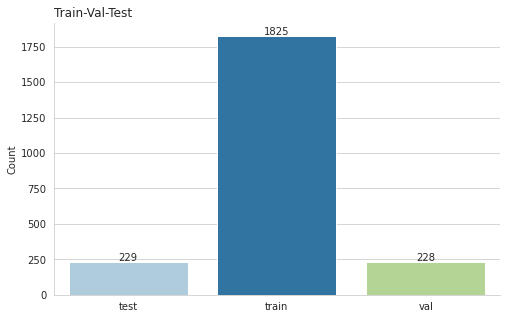

In [18]:
tmp = splitted_df.groupby('set').count()['image']

fig = plt.subplots(figsize=(8, 5))

p = sns.barplot(x=tmp.index, y=tmp)
p.set_xticklabels(labels=p.get_xticklabels(), rotation=0)
p.set_xlabel('')
p.set_ylabel('Count')
p.set_title('Train-Val-Test', loc='left')

for i, val in enumerate(tmp.to_list()):
    plt.text(x=i, y=val+10, s=str(val), ha='center', )

sns.despine()
plt.show()

In [19]:
splitted_df.to_csv('../data/split.csv', index=False)

## Fix Sets

In [7]:
train = pd.read_csv('../data/transformation_split.csv')

In [8]:
df = pd.read_csv('../data/labels.csv')

In [9]:
train

,image,transforms,label,set,filename
0,100201600.png,orig_pers_flipv,Rost/Strassenrost,train,100201600_orig_pers_flipv.png
1,100201600.png,blur_pers_rot,Rost/Strassenrost,train,100201600_blur_pers_rot.png
2,100023200.png,rot_fliph_orig,Rost/Strassenrost,train,100023200_rot_fliph_orig.png
3,100080900.png,jit_fliph_gray,Rost/Strassenrost,train,100080900_jit_fliph_gray.png
4,100180300.png,gray_jit_flipv,Vollguss/Pickelloch belueftet,train,100180300_gray_jit_flipv.png
...,...,...,...,...,...
10237,100102900.png,gray_flipv_blur,Rost/Einlauf rund,train,100102900_gray_flipv_blur.png
10238,100102900.png,jit_fliph_blur,Rost/Einlauf rund,train,100102900_jit_fliph_blur.png
10239,100102900.png,fliph_gray_jit,Rost/Einlauf rund,train,100102900_fliph_gray_jit.png
10240,100123400.png,orig_rot_pers,Vollguss/Pickelloch geschlossen,train,100123400_orig_rot_pers.png


In [25]:
val_test = df[~df['image'].isin(train['image'])]

In [26]:
val_test['transforms'] = '0'
val_test['label'] = val_test['type'] + '/' + val_test['subtype']

/tmp/ipykernel_68/4091450622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_test['transforms'] = '0'
/tmp/ipykernel_68/4091450622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_test['label'] = val_test['type'] + '/' + val_test['subtype']


In [27]:
val_test = val_test.drop(['type', 'subtype'], axis=1)

In [28]:
val_test['filename'] = val_test['image'].apply(lambda x: x.split('.')[0]) + '_' + val_test['transforms'].astype(str) + '.png'

In [29]:
val_test.head(4)

,image,transforms,label,filename
0,100161900.png,0,Rost/Strassenrost,100161900_0.png
6,100079200.png,0,"Vollguss/Handgriff geschlossen, verschraubt",100079200_0.png
15,100188800.png,0,Rost/Strassenrost,100188800_0.png
17,100009500.png,0,Gussbeton/Handgriff seitlich,100009500_0.png


In [43]:
val, test = train_test_split(val_test, test_size=.5, shuffle=True, stratify=val_test['label'])

In [47]:
val['set'] = 'val'
test['set'] = 'test'

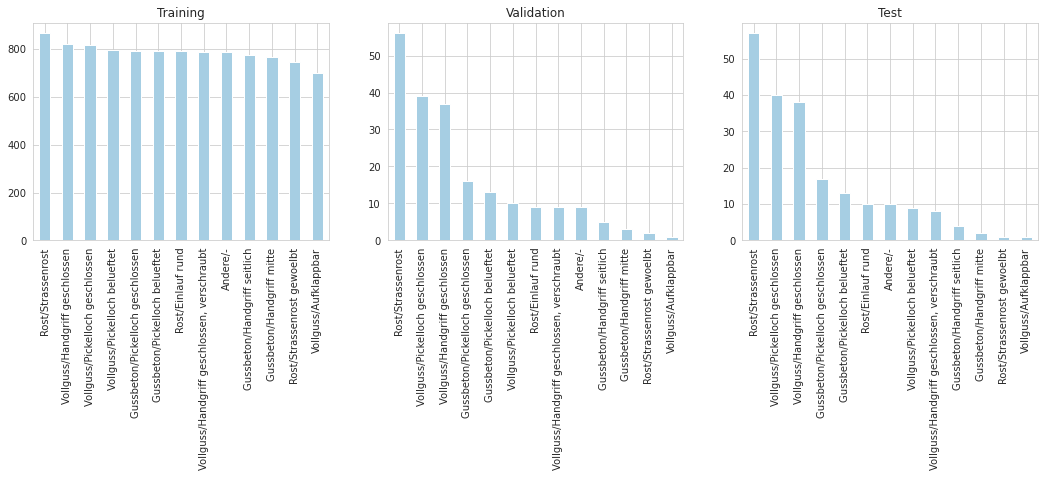

In [44]:
# CHeck dists

fig = plt.subplots(figsize=(18, 4))

plt.subplot(1,3,1)
p = train['label'].value_counts().plot(kind='bar')
p.set_title('Training')

plt.subplot(1,3,2)
p = val['label'].value_counts().plot(kind='bar')
p.set_title('Validation')

plt.subplot(1,3,3)
p = test['label'].value_counts().plot(kind='bar')
p.set_title('Test')

plt.show()

In [49]:
new_df = pd.concat([train, val, test], axis=0)

In [50]:
new_df.to_csv('../data/transformation_split.csv', index=False)